In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("projectML.csv")

numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]


In [4]:
# Define a small value to replace zeros
eps = 1e-300

# Replace zero or negative p-values safely
df["Meta_p_weighted_AD"] = df["Meta_p_weighted_AD"].replace(0, eps)
df["Meta_p_weighted_PD"] = df["Meta_p_weighted_PD"].replace(0, eps)
df["Meta_p_weighted_FTD"] = df["Meta_p_weighted_FTD"].replace(0, eps)
df["p_ALS"] = df["p_ALS"].replace(0, eps)

# Now compute scores
df["AD_score"] = (
    df["Avg_StdBeta_weighted_AD"].abs() *
    -np.log10(df["Meta_p_weighted_AD"])
)
df["PD_score"] = (
    df["Avg_StdBeta_weighted_PD"].abs() *
    -np.log10(df["Meta_p_weighted_PD"])
)
df["FTD_score"] = (
    df["Avg_StdBeta_weighted_FTD"].abs() *
    -np.log10(df["Meta_p_weighted_FTD"])
)
df["ALS_score"] = (
    df["StdBeta_ALS"].abs() *
    -np.log10(df["p_ALS"])
)


In [5]:
top_ad = df.sort_values("AD_score", ascending=False)[["EntrezGeneSymbol", "TargetFullName", "AD_score"]].head(20)
top_pd = df.sort_values("PD_score", ascending=False)[["EntrezGeneSymbol", "TargetFullName", "PD_score"]].head(20)
top_ftd = df.sort_values("FTD_score", ascending=False)[["EntrezGeneSymbol", "TargetFullName", "FTD_score"]].head(20)
top_als = df.sort_values("ALS_score", ascending=False)[["EntrezGeneSymbol", "TargetFullName", "ALS_score"]].head(20)


In [2]:
print(df.shape) 


(7289, 75)


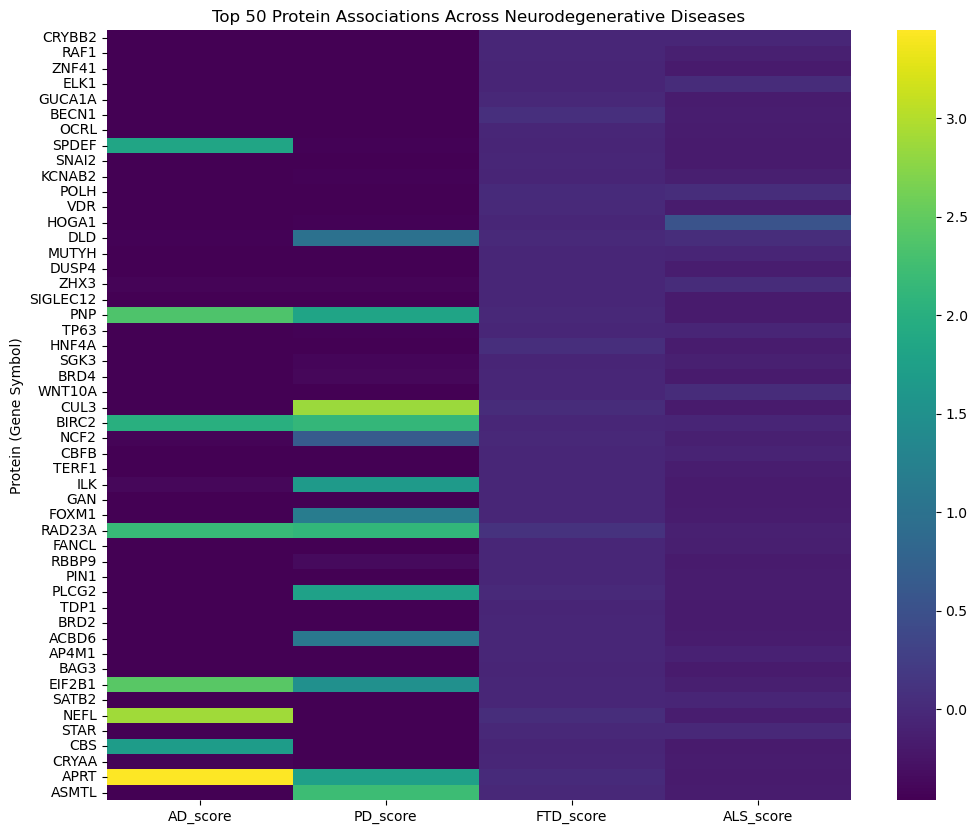

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset only score columns
scores = df[["EntrezGeneSymbol", "AD_score", "PD_score", "FTD_score", "ALS_score"]].set_index("EntrezGeneSymbol")

# Normalize for comparability
scores = (scores - scores.mean()) / scores.std()

plt.figure(figsize=(12,10))
sns.heatmap(scores.head(50), cmap="viridis")
plt.title("Top 50 Protein Associations Across Neurodegenerative Diseases")
plt.ylabel("Protein (Gene Symbol)")
plt.show()


In [33]:
print("Normalized Disease Scores (z-scored):")
print(scores.head(50).round(3))

Normalized Disease Scores (z-scored):
                  AD_score  PD_score  FTD_score  ALS_score
EntrezGeneSymbol                                          
CRYBB2              -0.459    -0.455     -0.044     -0.042
RAF1                -0.460    -0.461     -0.049     -0.120
ZNF41               -0.448    -0.462     -0.051     -0.174
ELK1                -0.454    -0.461     -0.051      0.025
GUCA1A              -0.460    -0.460     -0.025     -0.161
BECN1               -0.457    -0.453      0.065     -0.144
OCRL                -0.461    -0.459     -0.045     -0.159
SPDEF                1.841    -0.434     -0.050     -0.178
SNAI2               -0.457    -0.462     -0.046     -0.177
KCNAB2              -0.460    -0.437     -0.051     -0.141
POLH                -0.460    -0.449     -0.002      0.036
VDR                 -0.456    -0.456     -0.011     -0.170
HOGA1               -0.459    -0.439     -0.049      0.541
DLD                 -0.444     1.001     -0.009      0.040
MUTYH             